In [28]:
import pandas as pd
import requests
import json
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# funciones de utilidad
API_URL = u'http://species.conabio.gob.mx/api-dev/niche'
print(requests.get(API_URL).text)
def json_pretty_str(dict_obj):
    return json.dumps(dict_obj,
                     sort_keys=True,
                     indent=4,
                     separators=(',', ': '))

def desplegar_puntos(points_arr):
    min_coords = points_arr.min(axis=0)
    max_coords = points_arr.max(axis=0)

    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-120, -86, 10, 40])
    ax.stock_img()
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.coastlines()
    ax.scatter(points_arr[:,0],points_arr[:,1],transform=ccrs.PlateCarree(), zorder=4, marker='.')
    
    plt.show()

def obtener_puntos_especie(nom_especie):
    spid = obtener_id_especie(nom_especie)
    # Ya con el ID de especie del jaguar (SPID), pedimos todos los registros que hay en la base de datos
    query = {
        "qtype": "getSpecies",
        "id": spid,
        'sfecha': 'false',
        'sfosil': 'false'
    }

    r = requests.post(API_URL+'/especie', params=query)
    print(r)
    
    response = json.loads(r.content)
    print(json_pretty_str(response['data'][:3]))

    points = [json.loads(e['json_geom'])['coordinates'] for e in response['data']]
    points_arr = np.array(points)
    
    return points_arr

def obtener_id_especie(nom_especie):
    query = {
        "qtype":"getEntList",
        "searchStr":nom_especie, # Nombre de la especie substring de la especie a buscar
        "nivel":"especievalidabusqueda",
        "source":1
    }
    r = requests.post(API_URL+'/especie', params=query)

    response = json.loads(r.content)
    species_md = response['data'][0]
    print(json_pretty_str(species_md))
    
    return species_md['spid']

{"data":{"message":"¡Yey! Bienvenido al API de NICHE"}}


In [3]:
obs_jaguar = obtener_puntos_especie('Panthera onca')

{
    "clasevalida": "Mammalia",
    "especievalidabusqueda": "Panthera onca",
    "familiavalida": "Felidae",
    "generovalido": "Panthera",
    "ordenvalido": "Carnivora",
    "phylumdivisionvalido": "Craniata",
    "reinovalido": "Animalia",
    "spid": 28938
}
<Response [200]>
[
    {
        "aniocolecta": "1980",
        "fechacolecta": "1980",
        "gridid": 42958,
        "json_geom": "{\"type\":\"Point\",\"coordinates\":[-100.1844444,17.4597222]}",
        "urlejemplar": "www.snib.mx/snibgeoportal/Ejemplar.php?id=93d2815502e962036f7a3983092751c7"
    },
    {
        "aniocolecta": "1968",
        "fechacolecta": "1968-05-26",
        "gridid": 35826,
        "json_geom": "{\"type\":\"Point\",\"coordinates\":[-103.94972,19.44417]}",
        "urlejemplar": "www.snib.mx/snibgeoportal/Ejemplar.php?id=0f3740992280f6a28c8ed3930cb43d70"
    },
    {
        "aniocolecta": "1969",
        "fechacolecta": "1969-07-17",
        "gridid": 35826,
        "json_geom": "{\"type\":\"Poi

# Datos

## Origen de datos
## Modelo de datos

## Origen de datos: Procesos de puntos
### Simulación
### Ejemplo datos reales: observaciones de jaguar

Utilizaremos los servicios de datos de nuestra plataforma SPECIES

<IPython.core.display.Javascript object>


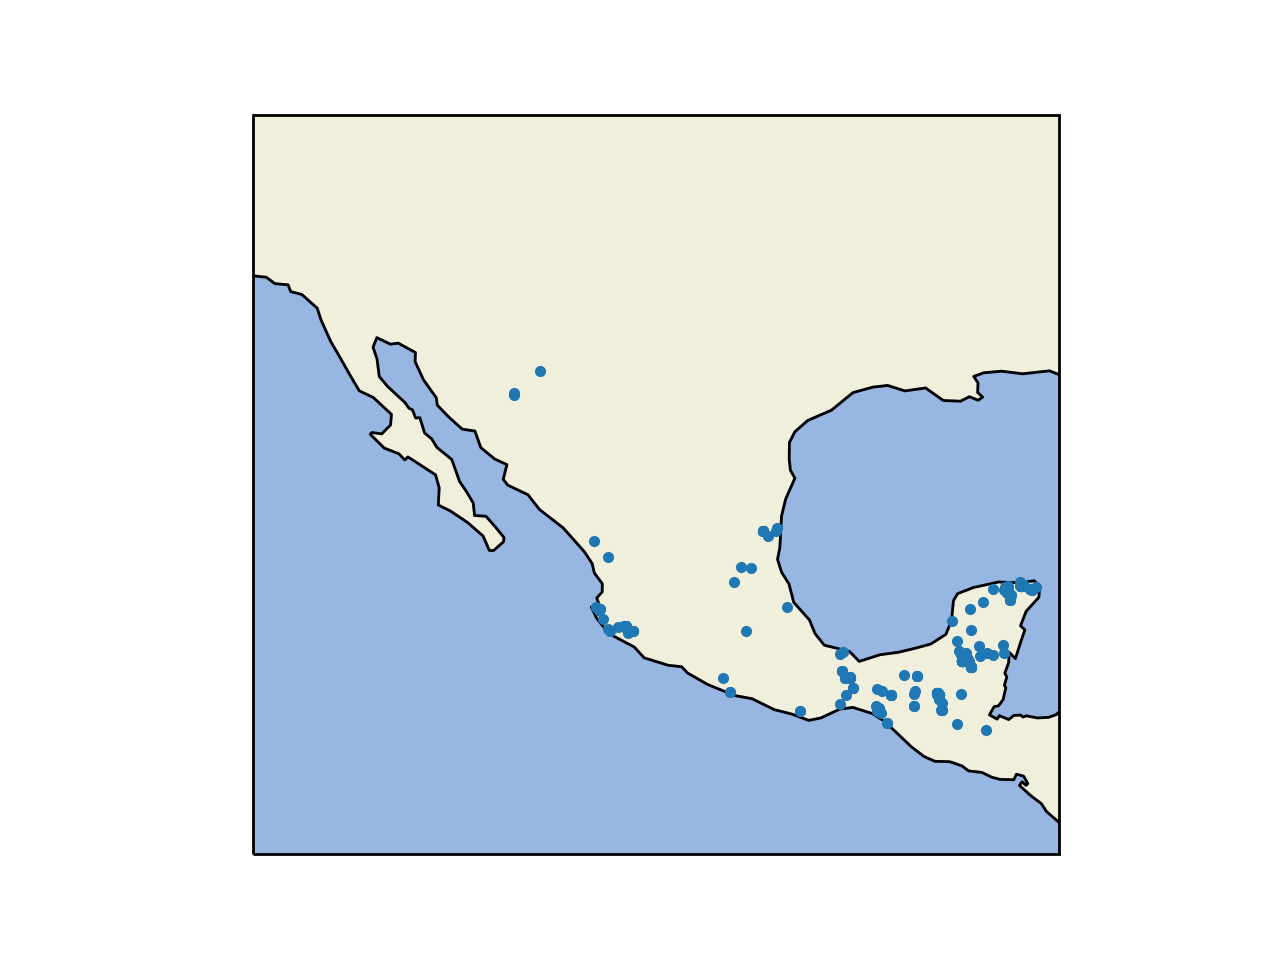

In [4]:
desplegar_puntos(obs_jaguar)

## Capas continuas

# Probabilidad y estadística (aprender de los datos)
## Variables aleatorias

## Funciones de densidad/masa de probabilidad
### Uniforme (le menos informativa)
### PMF Binomial
### PDF Normal
### Parámetros de las funciones de masa/densidad

## Conjunta, marginal, condicional

## ¿Uso?
Describir sistemas naturales mediante variables aleatorias y distribuciones de probabilidad. Descirbir el resultado de preocesos ecológicos mediante variables aleatorias donde las distribuciones de probabilidad describen la variabilidad en dichos procesos. La probabilidad es la base conceptual para modelar.



In [9]:
from IPython.display import Image, SVG

cholera_img = Image(filename='imgs/Snow-cholera-map-1.jpg', width=1024)

{{cholera_img}}
By John Snow - Published by C.F. Cheffins, Lith, Southhampton Buildings, London, England, 1854 in Snow, John. On the Mode of Communication of Cholera, 2nd Ed, John Churchill, New Burlington Street, London, England, 1855.(This image was originally from en.wikipedia; description page is/was here.Image copied fromhttp://matrix.msu.edu/~johnsnow/images/online_companion/chapter_images/fig12-5.jpg), Public Domain, https://commons.wikimedia.org/w/index.php?curid=2278605

The table below gives the coordinates of 578 person who died of cholera. The data are a digitized version of Snow's map, with coordinate relative to a set of axes through the center of the map, produced by the National Center for Geographic Information and Analysis (www.ncgia.ucsb.edu). The units are meters. The data have been modified by rounding to the nearest 0.1 meter.


In [14]:
cholera_deaths_df = pd.read_csv('data/snow-cholera/Deaths.csv')
pumps_df = pd.read_csv('data/snow-cholera/Pumps.csv')



x     y
0  13.6  11.1
1   9.9  12.6
2  14.7  10.2
3  15.2  10.0
4  13.2  13.0

### Ubicaciones de muertes por cólera
{{cholera_deaths_df.head()}}

### Ubicaciones de bombas
{{pumps_df}}

<IPython.core.display.Javascript object>


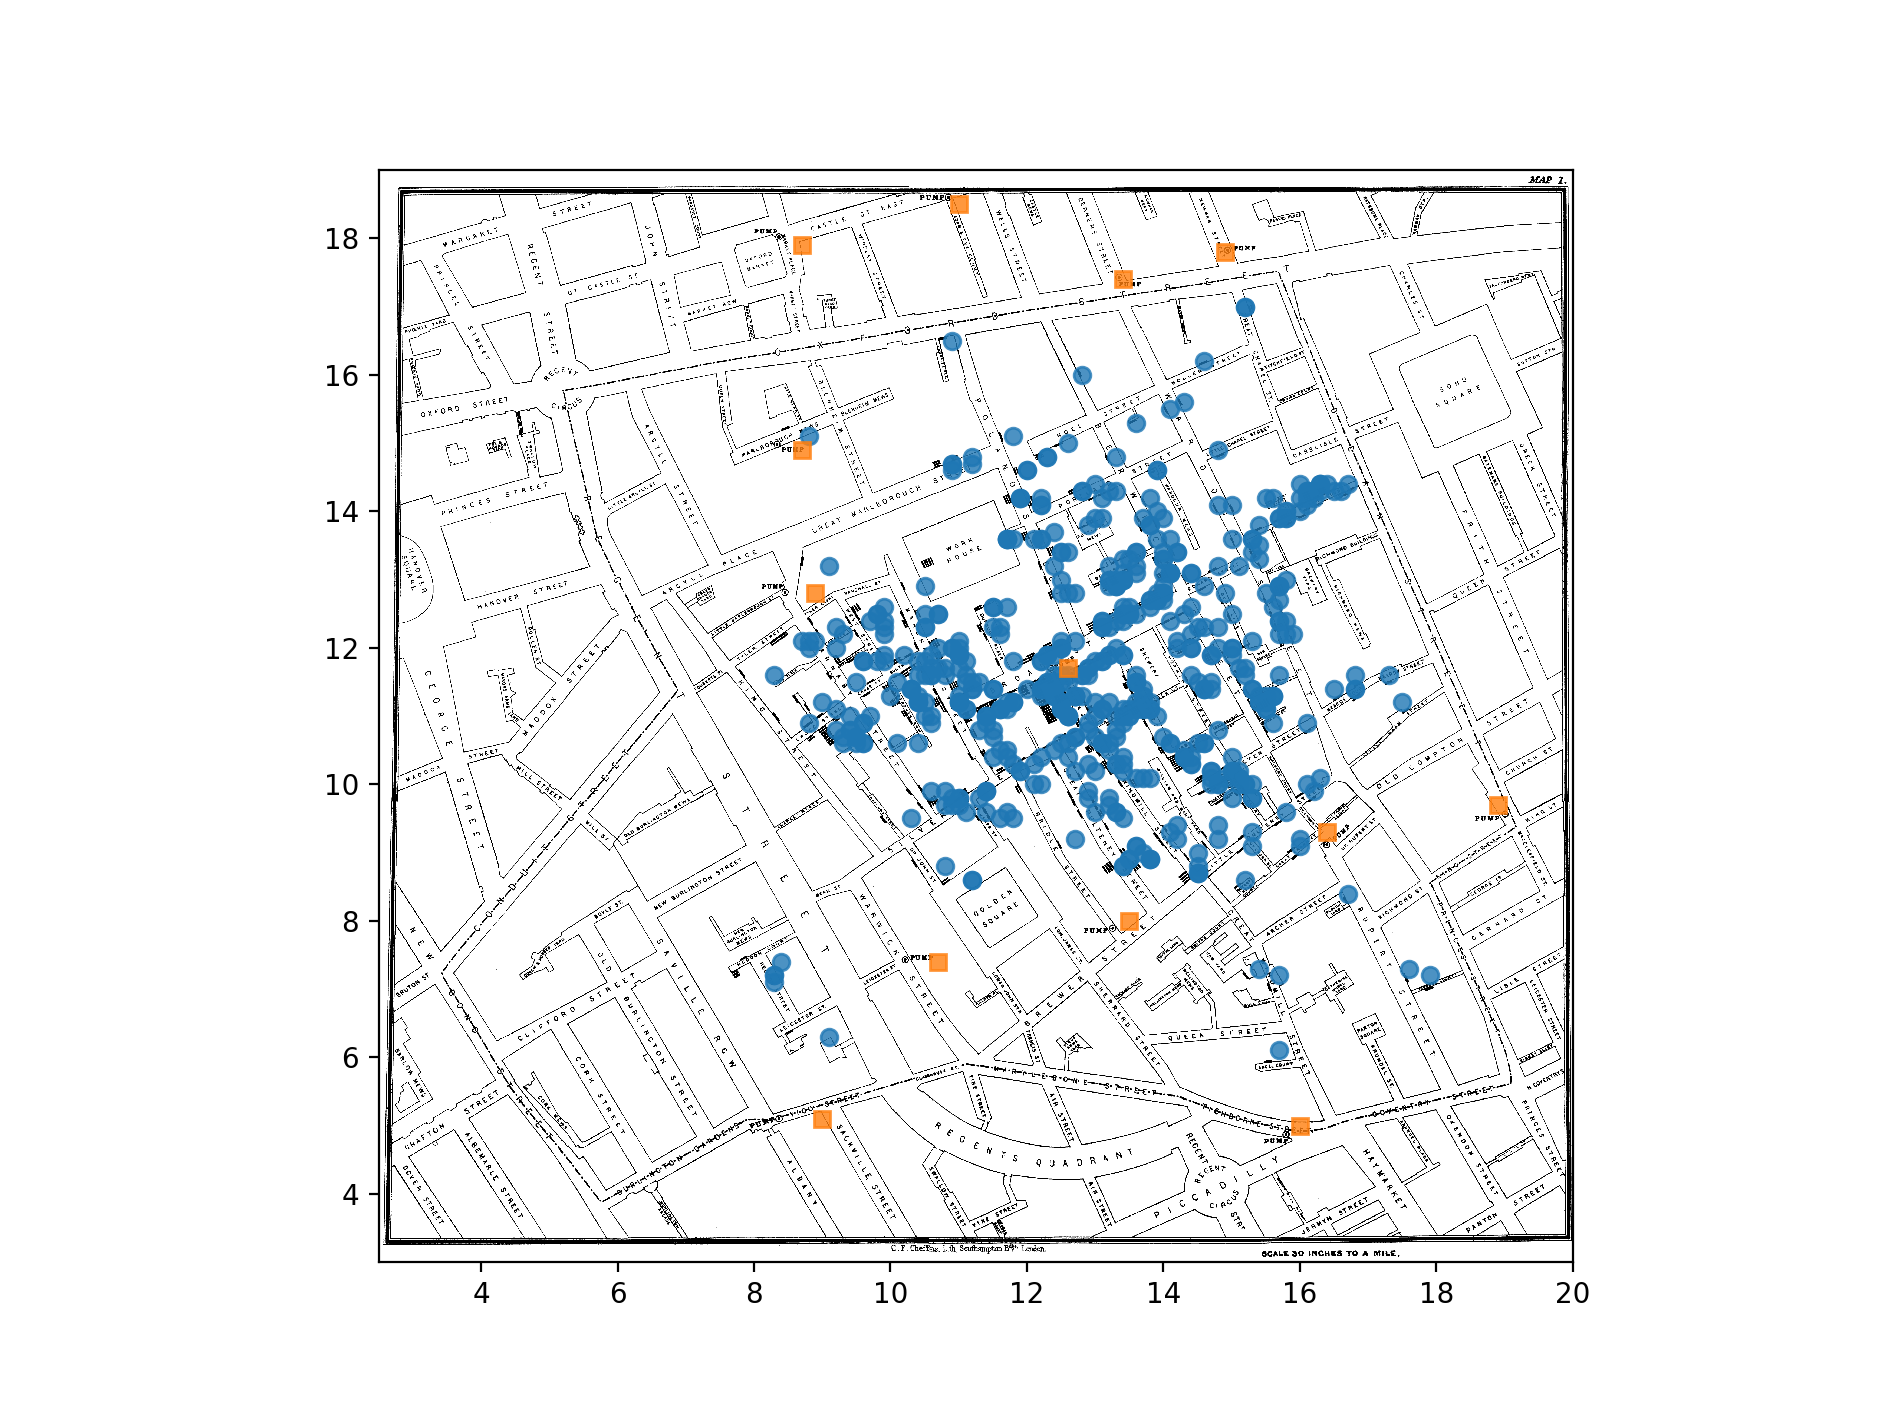

In [60]:
img = plt.imread("imgs/snow_map.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[2.5, 20, 3, 19])

plt.plot(cholera_deaths_df.x, cholera_deaths_df.y, marker='o', lw=0, alpha=0.8)
plt.plot(pumps_df.x, pumps_df.y, marker='s', lw=0, alpha=0.8)

<IPython.core.display.Javascript object>


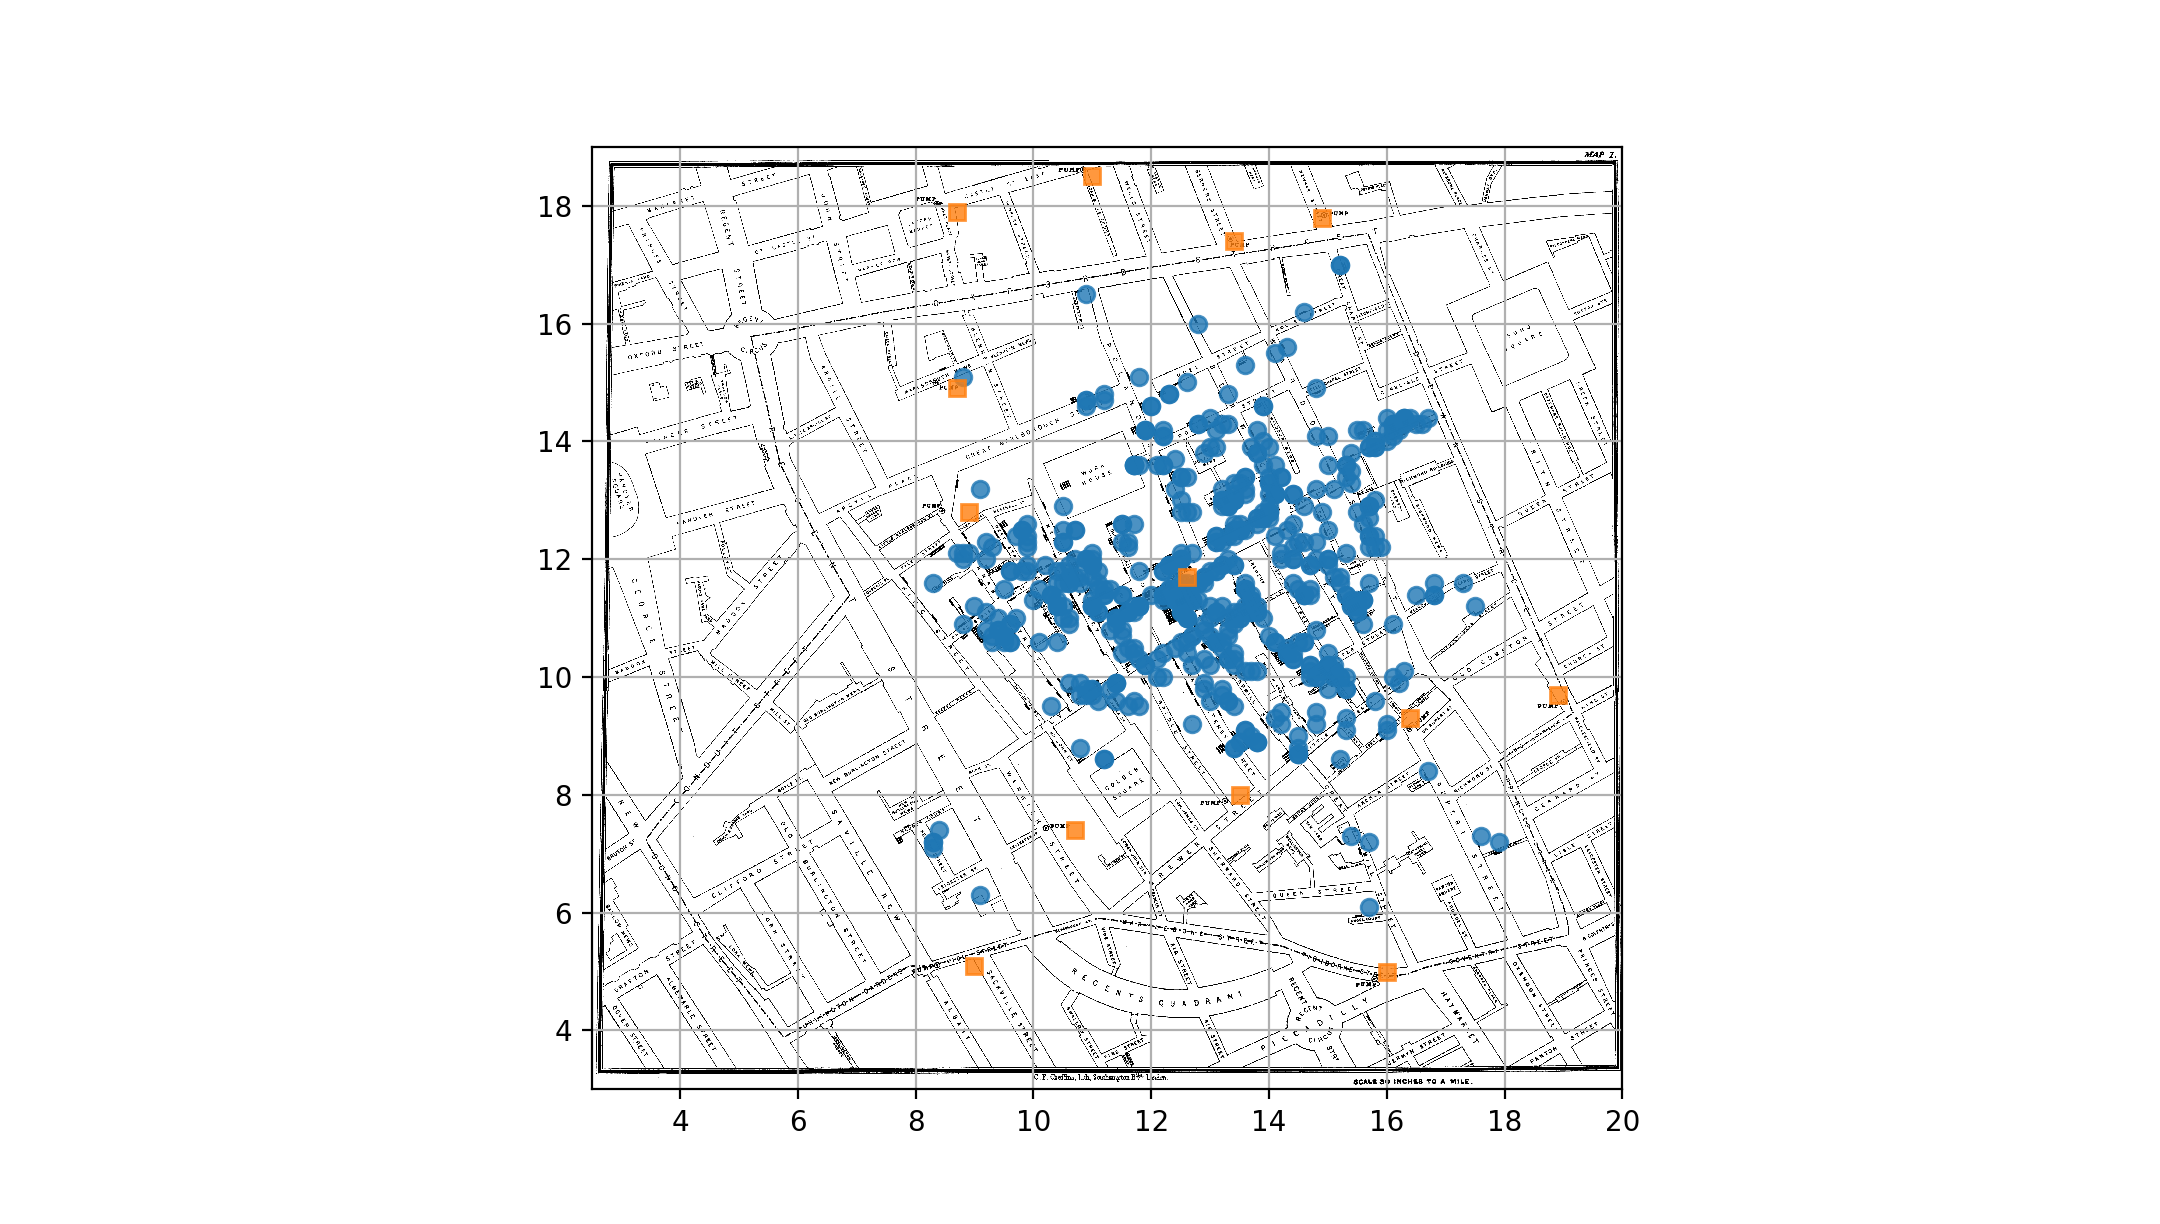

In [64]:
img = plt.imread("imgs/snow_map.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[2.5, 20, 3, 19])

plt.plot(cholera_deaths_df.x, cholera_deaths_df.y, marker='o', lw=0, alpha=0.8)
plt.plot(pumps_df.x, pumps_df.y, marker='s', lw=0, alpha=0.8)
plt.grid()

<IPython.core.display.Javascript object>


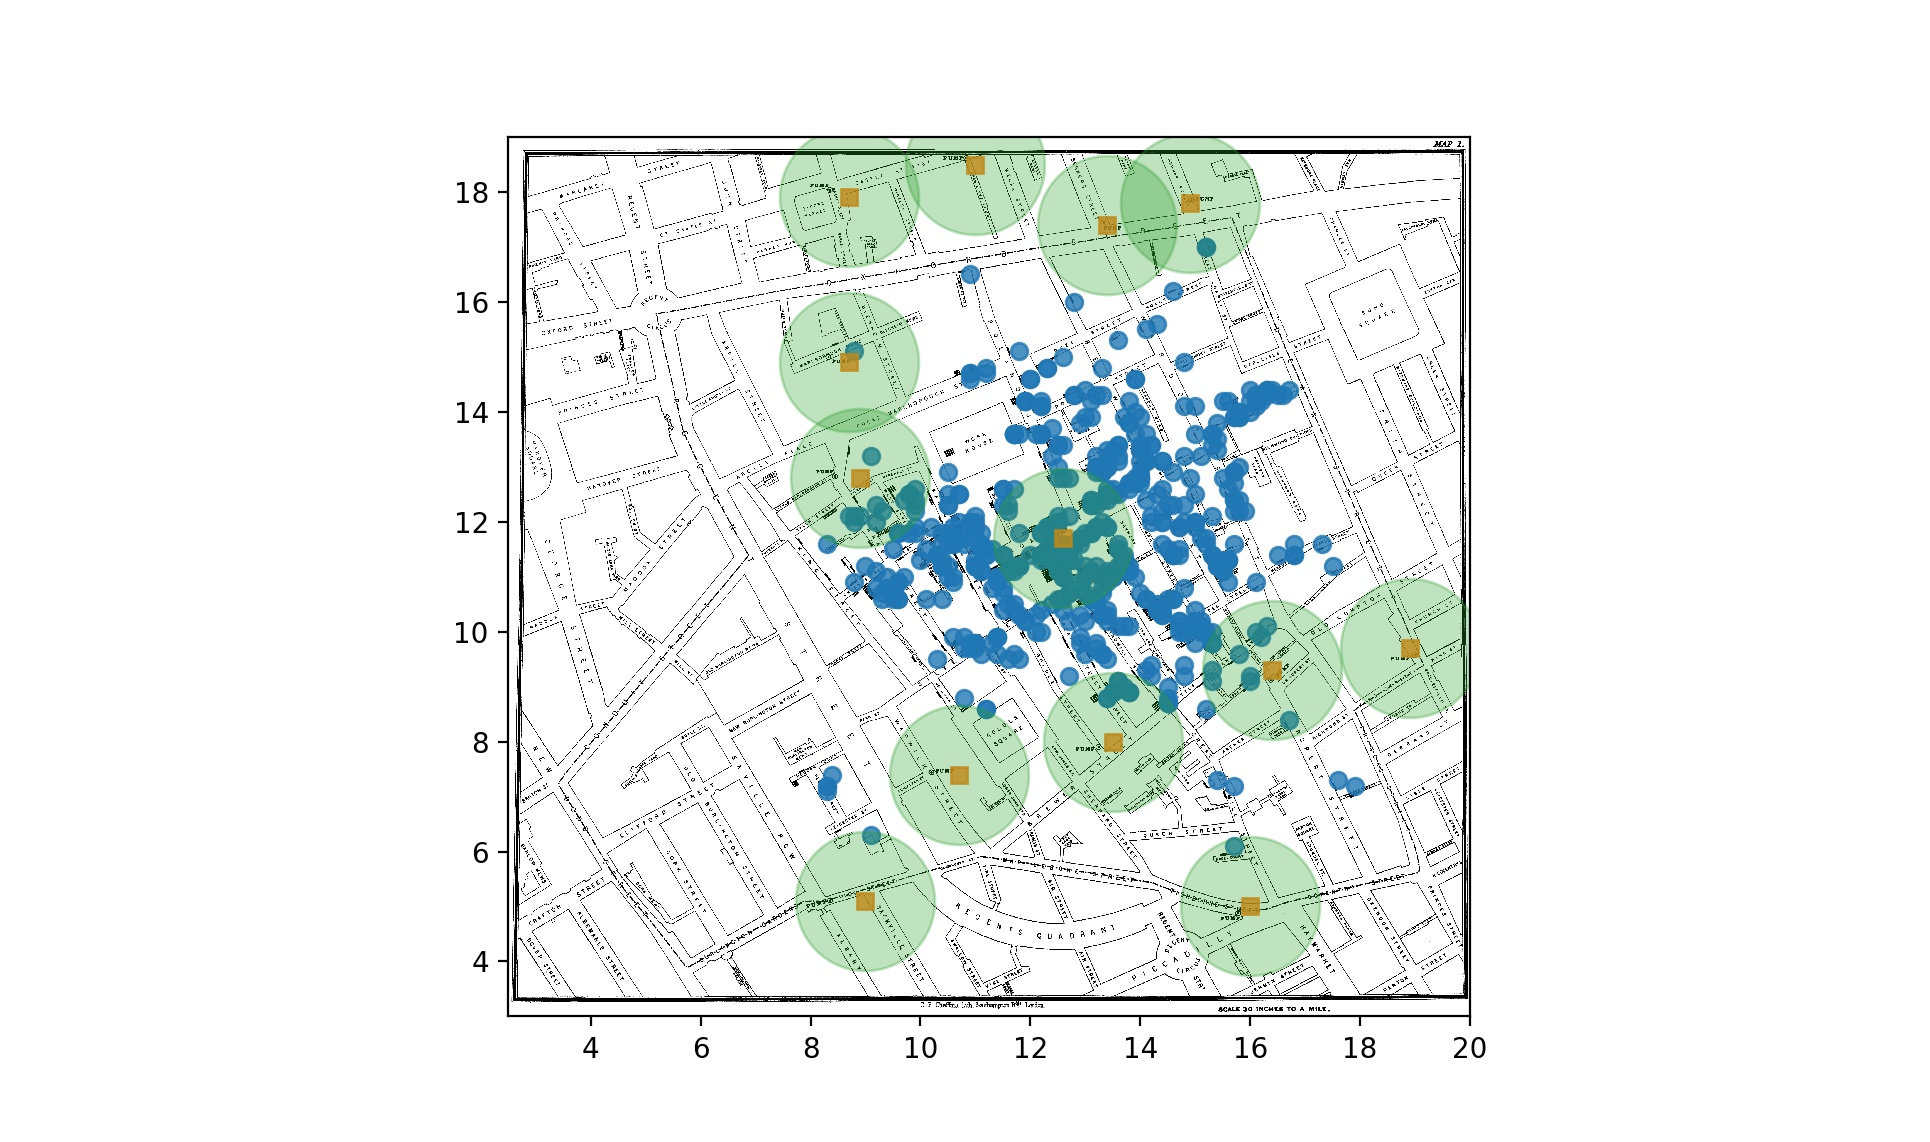

In [112]:
img = plt.imread("imgs/snow_map.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[2.5, 20, 3, 19])

plt.plot(cholera_deaths_df.x, cholera_deaths_df.y, marker='o', lw=0, alpha=0.8)
plt.plot(pumps_df.x, pumps_df.y, marker='s', lw=0, alpha=0.8)
plt.plot(pumps_df.x, pumps_df.y, marker='o', lw=0, alpha=0.3, markersize=50)

    

In [95]:
def death_toll(deaths, pumps, radius = 1):
    
    death_toll = []
    print(pumps)
    for i, p in pumps.iterrows():
        death_count = 0
        
        for j, d in deaths.iterrows():
            dist = ((p.x - d.x)**2 + (p.y - d.y)**2)**0.5
            if dist <= radius:
                death_count += 1
        
        death_toll.append(death_count)
    
    return death_toll
        

In [103]:
deaths = death_toll(cholera_deaths_df, pumps_df)

       x     y
0    8.7  17.9
1   11.0  18.5
2   13.4  17.4
3   14.9  17.8
4    8.7  14.9
5    8.9  12.8
6   12.6  11.7
7   10.7   7.4
8   13.5   8.0
9   16.4   9.3
10  18.9   9.7
11  16.0   5.0
12   9.0   5.1


In [109]:
deaths = death_toll(cholera_deaths_df, pumps_df, 1.5)

       x     y
0    8.7  17.9
1   11.0  18.5
2   13.4  17.4
3   14.9  17.8
4    8.7  14.9
5    8.9  12.8
6   12.6  11.7
7   10.7   7.4
8   13.5   8.0
9   16.4   9.3
10  18.9   9.7
11  16.0   5.0
12   9.0   5.1


<IPython.core.display.Javascript object>


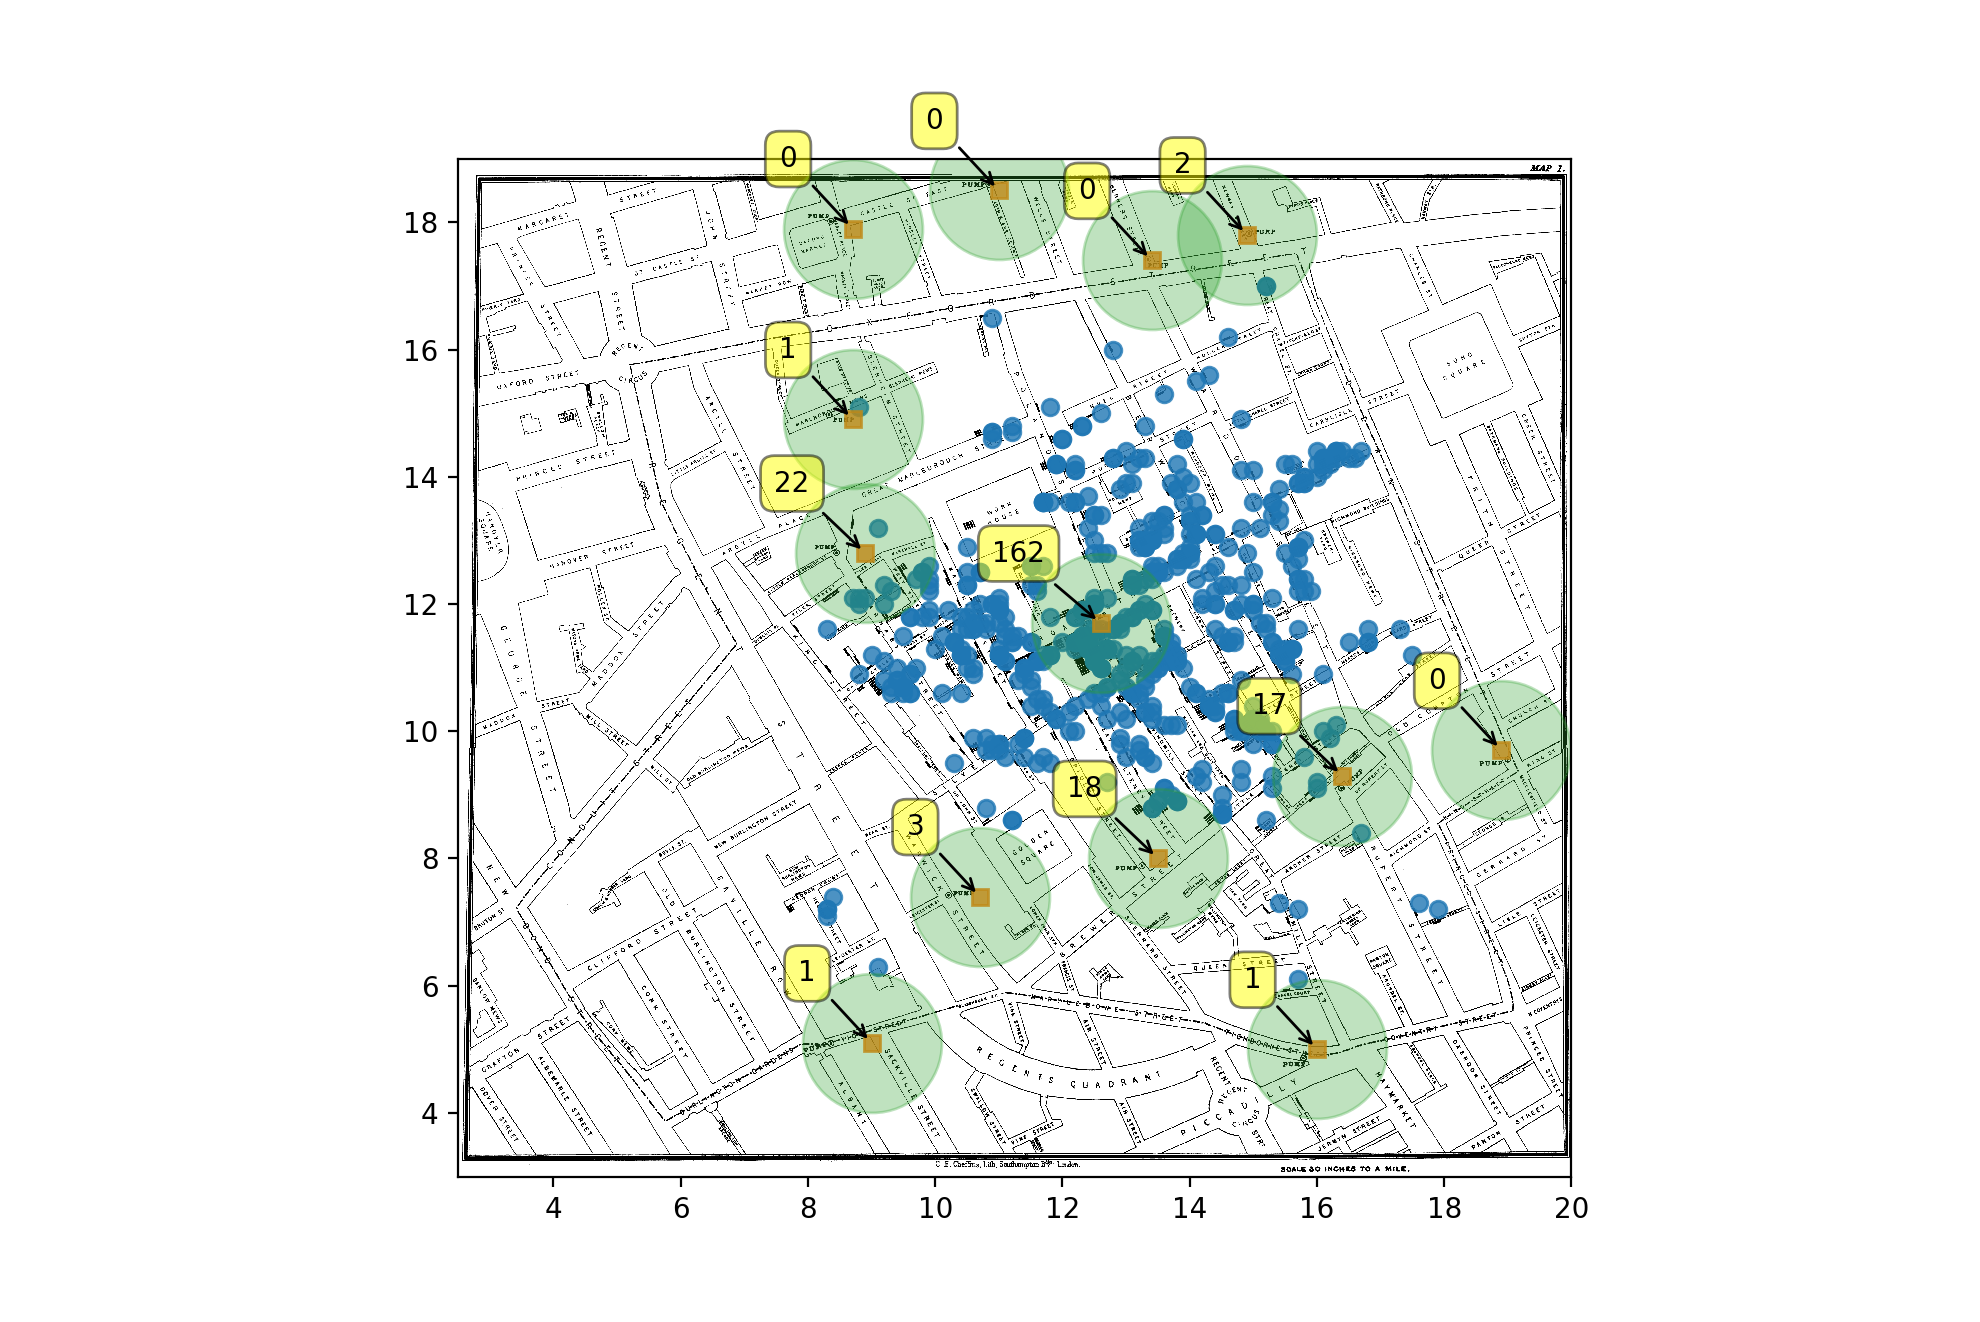

In [111]:
img = plt.imread("imgs/snow_map.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[2.5, 20, 3, 19])

plt.plot(cholera_deaths_df.x, cholera_deaths_df.y, marker='o', lw=0, alpha=0.8)
plt.plot(pumps_df.x, pumps_df.y, marker='s', lw=0, alpha=0.8)
plt.plot(pumps_df.x, pumps_df.y, marker='o', lw=0, alpha=0.3, markersize=50)

for label, x, y in zip(deaths, pumps_df.x, pumps_df.y):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
# https://stackoverflow.com/questions/5147112/matplotlib-how-to-put-individual-tags-for-a-scatter-plot